In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
cursos_coursera = pd.read_csv("./Datasets/Coursera_courses.csv")

In [4]:
cursos_coursera.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [5]:
cursos_coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [46]:
cursos_coursera.drop(columns="course_url",inplace=True)

In [7]:
coursera_reviews = pd.read_csv("./Datasets/Coursera_reviews.csv")

In [8]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [9]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [10]:
coursera_reviews.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [11]:
coursera_reviews.dropna(inplace=True)

In [12]:
coursera_reviews.shape

(1454558, 5)

In [13]:
coursera_reviews["reviews"]

0          Pretty dry, but I was able to pass with just t...
1          would be a better experience if the video and ...
2          Information was perfect! The program itself wa...
3          A few grammatical mistakes on test made me do ...
4          Excellent course and the training provided was...
                                 ...                        
1454706                                                    g
1454707                                                    .
1454708                                                    .
1454709                                                    .
1454710                                                    G
Name: reviews, Length: 1454558, dtype: object

# NO VOLVER A CORRER!

In [14]:
# import nltk
# import re

# # Download necessary resources for NLTK
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('vader_lexicon')

# # Function to check if a review is poorly written
# def mal_escrito(review):
#     # Tokenize the review text
#     tokens = nltk.word_tokenize(review)
  
#     # Check if the review has less than a certain number of tokens
#     if len(tokens) < 5:
#         return True
  
#     # Perform part-of-speech tagging on the tokens
#     tagged_tokens = nltk.pos_tag(tokens)
  
#     # Check if the review has mostly nouns and pronouns
#     noun_count = 0
#     pronoun_count = 0
#     for token, tag in tagged_tokens:
#         if re.match(r'NN.*', tag):
#             noun_count += 1
#         elif re.match(r'PRP.*', tag):
#             pronoun_count += 1
  
#     total_count = noun_count + pronoun_count
#     if total_count > 0 and (noun_count / total_count) < 0.5:
#         return True
  
#     return False

# # Apply the is_poorly_written function to drop poorly written reviews
# coursera_reviews = coursera_reviews[~coursera_reviews["reviews"].apply(mal_escrito)]
# coursera_reviews.to_csv("./Datasets/Coursera_reviews.csv")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
coursera_reviews["reviews"].drop_duplicates(inplace=True)

In [36]:
coursera_reviews["reviewers"] = coursera_reviews["reviewers"].str.strip()

In [37]:
coursera_reviews["reviewers"].value_counts()

reviewers
By Muhammad A       506
By Michael S        400
By David M          388
By Abhishek S       376
By Michael B        361
                   ... 
By PRAJWAL A K        1
By Mayesha M R M      1
By Vadakattu A S      1
By Terrance R         1
By Abiyyu F D         1
Name: count, Length: 234994, dtype: int64

In [17]:
coursera_reviews.drop(coursera_reviews[coursera_reviews["reviewers"]=="By Deleted A"].index,inplace=True)

In [39]:
coursera_reviews.drop(columns="date_reviews",inplace=True)

In [40]:
coursera_reviews.reset_index(inplace=True)

In [43]:
coursera_reviews.drop(columns="index",inplace=True)

In [49]:
coursera_reviews.head()

,reviews,reviewers,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training


In [50]:
cursos_coursera.head()

,name,institution,course_id
0,Machine Learning,Stanford University,machine-learning
1,Indigenous Canada,University of Alberta,indigenous-canada
2,The Science of Well-Being,Yale University,the-science-of-well-being
3,Technical Support Fundamentals,Google,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training


In [52]:
coursera_completo = coursera_reviews.merge(cursos_coursera, on="course_id")

In [53]:
coursera_completo

,reviews,reviewers,rating,course_id,name,institution
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
...,...,...,...,...,...,...
1158893,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158894,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158895,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158896,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [58]:
coursera_completo["reviews"] = coursera_completo["reviews"].loc[~coursera_completo["reviews"].duplicated()]


In [60]:
coursera_completo.dropna(inplace=True)

In [62]:
coursera_completo["name"].value_counts()

name
Programming for Everybody (Getting Started with Python)                           13421
Machine Learning                                                                  12247
Neural Networks and Deep Learning                                                 11900
Learning How to Learn: Powerful mental tools to help you master tough subjects    10758
Technical Support Fundamentals                                                     9669
                                                                                  ...  
Epigenetic Control of Gene Expression                                                 2
Entreprise et changement climatique                                                   2
Entrepreneurship Strategy: From Ideation to Exit                                      1
Introduction to Healthcare                                                            1
Curanderismo: Traditional Healing Using Plants                                        1
Name: count, Length: 602, d

In [63]:
conteo_names = coursera_completo["name"].value_counts()
coursera_completo = coursera_completo[coursera_completo["name"].isin(conteo_names[conteo_names > 5000].index)]


In [64]:
coursera_completo

,reviews,reviewers,rating,course_id,name,institution
13795,I did not find this course helpful. The assign...,By Eric V H,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13796,I got a 95% and maybe I learned something but ...,By Connor B,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13797,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13798,We tried to use this class to teach a brown ba...,By Steve M,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13799,"To be honest, I thought the course stumbled an...",By Terence P,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
...,...,...,...,...,...,...
1158865,great class !!!,By Olibrice D,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158883,loved it\(00)/,By Austin P,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158885,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158886,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [65]:
coursera_graph = coursera_completo[["rating","course_id"]]

In [69]:
coursera_graph = coursera_graph.groupby(by="course_id")["rating"].sum()

In [72]:
coursera_graph = coursera_graph.to_frame().reset_index()


In [74]:
coursera_graph.sort_values("rating",ascending=False)

,course_id,rating
5,python,62614
3,machine-learning,58319
4,neural-networks-deep-learning,56955
2,learning-how-to-learn,51918
7,technical-support-fundamentals,46170
6,python-data,42476
8,the-science-of-well-being,32936
1,excel-essentials,27869
0,ai-for-everyone,26766
9,what-is-datascience,26452


In [155]:
rating_conteo = coursera_completo.groupby('course_id')['rating'].value_counts().unstack(fill_value=0)

In [157]:
rating_conteo

rating,1,2,3,4,5
course_id,,,,,
ai-for-everyone,8,10,52,608,4830
excel-essentials,16,11,32,475,5167
learning-how-to-learn,37,24,134,1384,9179
machine-learning,62,55,204,2095,9831
neural-networks-deep-learning,33,44,247,1787,9789
python,85,72,383,3169,9712
python-data,22,18,96,860,7738
technical-support-fundamentals,91,51,189,1280,8058
the-science-of-well-being,23,10,25,307,6318


In [161]:
coursera_titulos = ' '.join(coursera_completo['name'])

In [162]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(coursera_titulos)

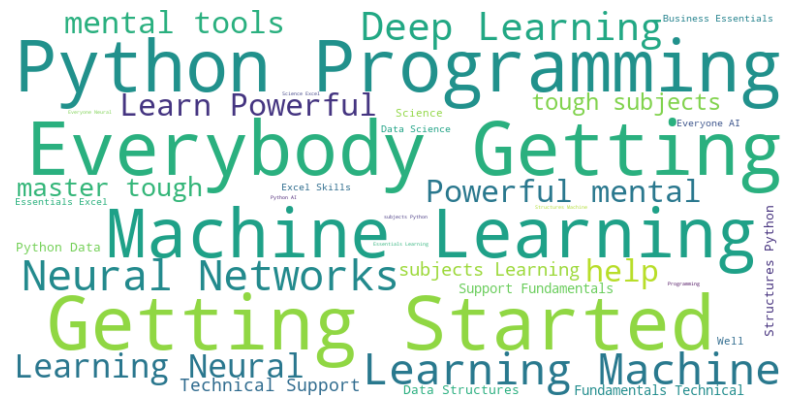

In [163]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
edx = pd.read_csv("./Datasets/edx_courses.csv")

In [19]:
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [78]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          975 non-null    object
 1   n_enrolled     855 non-null    object
 2   Level          975 non-null    object
 3   subject        975 non-null    object
 4   language       975 non-null    object
 5   subtitles      972 non-null    object
 6   course_length  975 non-null    object
 7   price          975 non-null    object
dtypes: object(8)
memory usage: 61.1+ KB


In [77]:
edx.drop(columns=["summary","course_type","institution","instructors","course_effort","course_description","course_syllabus","course_url"],inplace=True)

In [79]:
edx

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
0,How to Learn Online,"124,980",Introductory,Education & Teacher Training,English,English,2 Weeks,FREE-Add a Verified Certificate for $49 USD
1,Programming for Everybody (Getting Started wit...,"293,864",Introductory,Computer Science,English,English,7 Weeks,FREE-Add a Verified Certificate for $49 USD
2,CS50's Introduction to Computer Science,"2,442,271",Introductory,Computer Science,English,English,12 Weeks,FREE-Add a Verified Certificate for $90 USD
3,The Analytics Edge,"129,555",Intermediate,Data Analysis & Statistics,English,English,13 Weeks,FREE-Add a Verified Certificate for $199 USD
4,Marketing Analytics: Marketing Measurement Str...,"81,140",Introductory,Computer Science,English,English,4 Weeks,FREE-Add a Verified Certificate for $249 USD
...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,NaN,Intermediate,Social Sciences,English,English,10 Weeks,FREE-Add a Verified Certificate for $25 USD
971,Pattern Studying and Making | 图案审美与创作,NaN,Introductory,Art & Culture,中文,"English, 中文",12 Weeks,FREE-Add a Verified Certificate for $139 USD
972,Computational Neuroscience: Neuronal Dynamics ...,"11,246",Advanced,Biology & Life Sciences,English,English,6 Weeks,FREE-Add a Verified Certificate for $139 USD
973,Cities and the Challenge of Sustainable Develo...,"8,775",Introductory,Environmental Studies,English,English,1 Weeks,FREE-Add a Verified Certificate for $25 USD


In [80]:
edx[["price"]]

,price
0,FREE-Add a Verified Certificate for $49 USD
1,FREE-Add a Verified Certificate for $49 USD
2,FREE-Add a Verified Certificate for $90 USD
3,FREE-Add a Verified Certificate for $199 USD
4,FREE-Add a Verified Certificate for $249 USD
...,...
970,FREE-Add a Verified Certificate for $25 USD
971,FREE-Add a Verified Certificate for $139 USD
972,FREE-Add a Verified Certificate for $139 USD
973,FREE-Add a Verified Certificate for $25 USD


In [81]:
edx['price'] = edx['price'].str.extract(r"(\d+)").astype(float)

In [154]:
edx[edx["price"]<10]

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
6,Leading High-Performing Teams,32847,Intermediate,Communication,English,English,10 Weeks,5.0
136,Design Thinking and Creativity for Innovation,47549,Intermediate,Business & Management,English,English,10 Weeks,5.0
237,Tourism and Travel Management,38503,Introductory,Business & Management,English,English,7 Weeks,5.0
417,Solid Waste Management,7668,Introductory,Environmental Studies,English,English,6 Weeks,5.0
458,Unlocking Investment and Finance in Emerging M...,29171,Introductory,Economics & Finance,English,English,4 Weeks,5.0
466,e-Learning on Digital Agriculture,6238,Introductory,Environmental Studies,English,English,5 Weeks,5.0
564,The Future of Work: Preparing for Disruption,43125,Introductory,Economics & Finance,English,"اللغة العربية, English, Español, Français, Рус...",5 Weeks,5.0


In [84]:
edx.dropna(inplace=True)

In [86]:
edx.sort_values("n_enrolled",ascending=False)

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
412,Introduction to Aeronautical Engineering,"99,971",Introductory,Engineering,English,English,7 Weeks,50.0
344,Computer Graphics,"98,553",Intermediate,Computer Science,English,"English, 中文",6 Weeks,99.0
261,Introducción a la gestión de proyectos,"98,517",Introductory,Business & Management,Español,Español,5 Weeks,50.0
329,How to Code: Simple Data,"98,113",Introductory,Computer Science,English,English,7 Weeks,125.0
82,Introduction to Corporate Finance,"98,093",Introductory,Business & Management,English,English,4 Weeks,225.0
...,...,...,...,...,...,...,...,...
783,Globalization: Past and Future,"10,127",Introductory,History,English,"English, Русский",4 Weeks,25.0
505,Digital Transformation in Business,"10,118",Advanced,Business & Management,English,English,7 Weeks,214.0
923,Age of Sustainable Development,"10,019",Intermediate,Social Sciences,English,"English, Português, Русский",14 Weeks,49.0
29,IELTS Academic Test Preparation,"1,103,777",Introductory,Communication,English,English,8 Weeks,99.0


In [91]:
edx["n_enrolled"] = edx["n_enrolled"].str.replace(",","")
edx["n_enrolled"] = edx["n_enrolled"].astype("Int64")

In [93]:
edx.sort_values("n_enrolled",ascending=False)

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
2,CS50's Introduction to Computer Science,2442271,Introductory,Computer Science,English,English,12 Weeks,90.0
29,IELTS Academic Test Preparation,1103777,Introductory,Communication,English,English,8 Weeks,99.0
31,TOEFL® Test Preparation: The Insider’s Guide,1022489,Introductory,Communication,English,English,6 Weeks,49.0
23,CS50's Web Programming with Python and JavaScript,698950,Intermediate,Computer Science,English,English,12 Weeks,90.0
64,Introduction to Linux,642088,Introductory,Computer Science,English,English,14 Weeks,199.0
...,...,...,...,...,...,...,...,...
794,General Overview of Cannabis and the Industry’...,5048,Introductory,Environmental Studies,English,English,4 Weeks,199.0
787,Tools for Academic Engagement in Public Policy,5035,Introductory,Communication,English,English,3 Weeks,199.0
676,Enterprise Selling,5020,Introductory,Business & Management,English,English,6 Weeks,149.0
722,Deep Learning Essentials,5018,Intermediate,Computer Science,English,English,5 Weeks,149.0


In [94]:
edx_pr = edx[["n_enrolled","price"]]

In [95]:
edx_price = edx_pr.groupby("price")["n_enrolled"].sum()

In [100]:
edx_price = edx_price.to_frame().reset_index()

In [102]:
edx_price.sort_values("n_enrolled",ascending=False)

,price,n_enrolled
8,49.0,10063575
18,99.0,9952448
29,199.0,4596439
17,90.0,3264459
9,50.0,3192084
24,149.0,2673189
25,150.0,1746238
33,249.0,1347861
4,25.0,1223102
23,139.0,1094260


In [104]:
edx_len = edx[["n_enrolled","course_length"]]

In [105]:
edx_lenght = edx_len.groupby("course_length")["n_enrolled"].sum()

In [106]:
edx_lenght = edx_lenght.to_frame().reset_index()

In [108]:
edx_lenght.sort_values("n_enrolled",ascending=False)

,course_length,n_enrolled
14,6 Weeks,7691916
3,12 Weeks,5910274
16,8 Weeks,5846822
12,4 Weeks,5748168
13,5 Weeks,5251679
1,10 Weeks,4467724
15,7 Weeks,3579155
6,15 Weeks,1288078
5,14 Weeks,1203766
17,9 Weeks,1137350


In [109]:
edx_lev = edx[["Level","n_enrolled"]]

In [110]:
edx_level = edx_lev.groupby("Level")["n_enrolled"].sum()

In [111]:
edx_level = edx_level.to_frame().reset_index()

In [112]:
edx_level.sort_values("n_enrolled",ascending=False)

,Level,n_enrolled
2,Introductory,32350969
1,Intermediate,10076928
0,Advanced,2962732


In [113]:
edx_lan = edx[["language","n_enrolled"]]

In [115]:
edx_language = edx_lan.groupby("language")["n_enrolled"].sum()

In [117]:
edx_language = edx_language.to_frame().reset_index()

In [118]:
edx_language.sort_values("n_enrolled",ascending=False)

,language,n_enrolled
1,English,41068628
2,Español,3704975
4,Italiano,281585
3,Français,161848
7,日本語,62757
6,中文,56158
5,Português,44021
0,Deutsch,10657


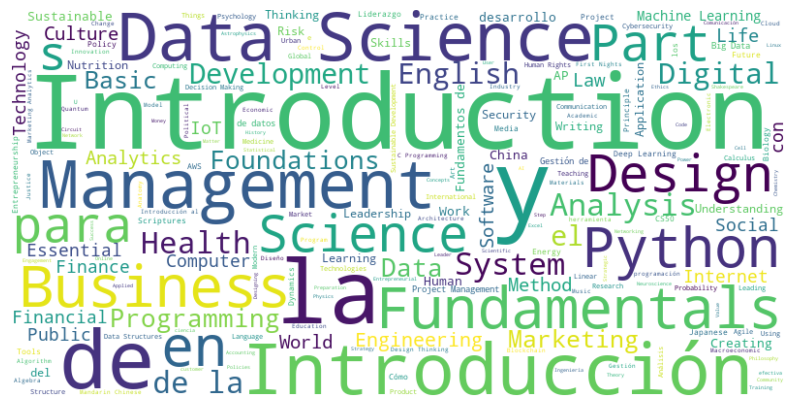

In [164]:
edx_titulos = " ".join(edx["title"])
wordcloudedx = WordCloud(width=800, height=400, background_color='white').generate(edx_titulos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloudedx, interpolation='bilinear')
plt.axis('off')
plt.show()

In [133]:
udemy = pd.read_csv("./Datasets/udemy_courses.csv")

In [134]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [136]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [137]:
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [126]:
udemy_paid = udemy[["is_paid","num_subscribers"]]

In [127]:
udemy_paid = udemy_paid.groupby(by="is_paid")["num_subscribers"].sum()

In [128]:
udemy_paid = udemy_paid.to_frame().reset_index()

In [130]:
udemy_paid

,is_paid,num_subscribers
0,False,3575525
1,True,8183595


<Axes: xlabel='is_paid', ylabel='num_subscribers'>

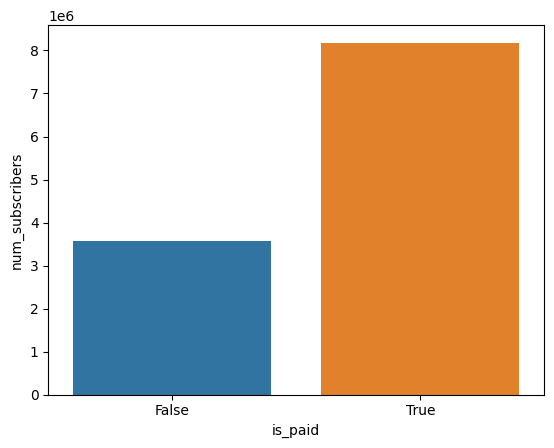

In [131]:
sns.barplot(data=udemy_paid,x="is_paid",y="num_subscribers")

In [140]:
udemy_gratis = udemy[udemy["price"]== 0]

In [141]:
udemy_pago = udemy[udemy["price"] != 0]

In [144]:
usuarios_gratis = udemy_gratis["num_subscribers"].sum()

In [145]:
usuarios_pagos=  udemy_pago["num_subscribers"].sum()

In [147]:
(usuarios_pagos / usuarios_gratis)

2.2887813677711666

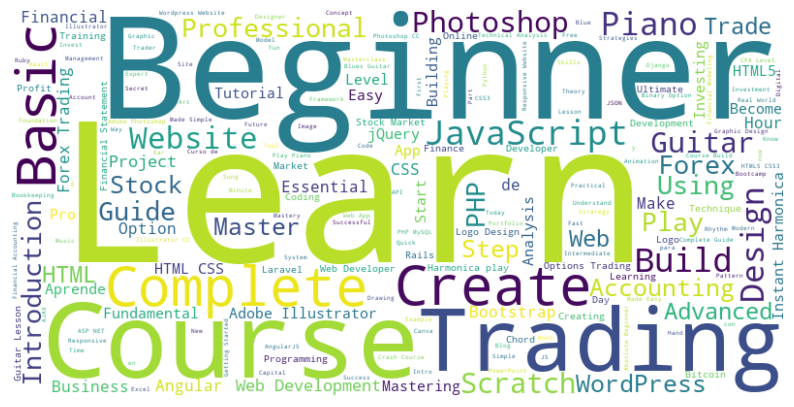

In [165]:
udemy_titulos = " ".join(udemy["course_title"])
wordcloududemy = WordCloud(width=800, height=400, background_color='white').generate(udemy_titulos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloududemy, interpolation='bilinear')
plt.axis('off')
plt.show()